# Multi-container knapsack

### Problem statement

We have 3 trucks: 0, 1 and 2.

We have 30 items, and each item can either be placed on a particular truck, or not placed on any truck.

Each item has a value and a weight.

We want to maximise the total value of the items we place on the trucks.

But each truck has its own weight limit, so for each truck we have to obey the limit on its weight.

Your task is to solve this problem, comparing multiple algorithms / algorithmic ideas, and variants, and multiple hyperparameter values where appropriate, and report on your results.

### Measuring performance

I provide an objective function which (a) checks whether the weight limits are obeyed, and if yes it returns the sum of values achieved. Otherwise it returns 0. In this objective function, the solution is specified as a bitstring. We think of it in chunks of 3, one chunk for each item. If a chunk is `100`, for example, it means that the item is in truck 0. `001` means it's in truck 2. If there's no 0 in the chunk, it means the item is not placed on any truck. If there's more than 1 `1` in the chunk, eg `110`, it means the solution is invalid, and again we return 0.

For example, with 5 items and 3 trucks, the following would be a valid bitstring for my objective function.

`001 100 001 010 000`

I also provide a function to print a solution in a condensed format like the above.

### Experiments

You are free to use any metaheuristic algorithms, including HC, SA, GA, and/or any variant. You are free to use any encoding, which could be a bitstring encoding or something else; a genotype-phenotype mapping, a repair mechanism, or similar; and/or custom `init`, `nbr`, and/or `crossover` operators. You are free to use a different objective function **during the run**, but remember that you must use my objective function for the **final evaluation**, for fair comparison of all methods. You are free to use ideas which you or others have suggested in class to improve the algorithms.

For each setup, you should run the setup 5 times with random seeds 0, 1, 2, 3, 4, and compare the mean performance.

If you wish, you can show curves to demonstrate behaviour, such as objective over time, or diversity over time.

### NAME: Gaurav Shinde
    STUDENT ID: 23104774    

## Experiment Title: Comparative Analysis of Optimization Algorithms for a Multi-Truck Knapsack Problem
The objective of our experiment is simple - to maximise the total value of the items we place on the trucks.
This experiment presents us with an interesting yet challenging combinatorial optimization problem.
### Introduction
We design our experiment focusing primarily on two algorithms: Hill Climbing and Genetic Algorithm. Initially, we started with a novel Hill Climbing approach that introduced two neighbor functions, nbr_new and nbr_shuffle, former focusing on adding items to underweight trucks and later reshuffling items from overweight trucks to underweight trucks to optimize the packing. However, we observed unsatisfactory results as the total value of packed items remained low, reaching only 768. Surprisingly, a basic Hill Climbing algorithm, used for solving single-truck knapsack problems, achieved better results with a total value of 1068.

Subsequently, we shifted our focus to implementing a Genetic Algorithm, incorporating roulette wheel selection and elitism. This approach yielded improved results, achieving a total value of 1268.

In [80]:
# 30 items, each with a weight and a value: (wt, val)
items = [(7, 70), (13, 25), (20, 50), (4, 38), (10, 48), (4, 72), (1, 12), (5, 30), (19, 21), (1, 99), 
         (8, 87), (14, 31), (19, 10), (10, 67), (19, 12), (11, 50), (8, 13), (3, 68), (12, 50), (13, 41), 
         (1, 67), (8, 98), (5, 28), (3, 15), (17, 78), (13, 83), (2, 25), (14, 79), (6, 48), (20, 49)]

In [81]:
def objective_function(x):
    total_value = 0
    container_weights = [0, 0, 0]
    # truck weight limits
    weight_limits = [72, 80, 109]
    
    for i, (wt, val) in enumerate(items):
        chunk = x[i*3 : i*3+3]
        
        if sum(chunk) > 1:
            return 0 # can't place item in more than truck
        if sum(chunk) == 0:
            continue # this item is not chosen
        # Find which container this item is allocated to: 0, 1 or 2
        idx = chunk.index(1)
        
        # Place the item in the container
        container_weights[idx] += wt
        if container_weights[idx] > weight_limits[idx]:
            return 0 # over-weight
        total_value += val
    
    return total_value

# useful for printing in a condensed format
def print_sol(x):
    for i in range(len(x) // 3):
        chunk = x[i*3 : i*3+3]
        for j in chunk:
            print(j, end="")
        print(" ", end="")
    print("")

Below is a short test / demo:

In [83]:

# 1,1,0 for item 0 is invalid
bad_solution1 = [1,1,0, 0,0,0, 0,0,0, 0,0,1, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 1,0,0, 0,0,0, 
                 0,0,0, 0,0,1, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,1,0, 0,0,0, 
                 0,0,0, 0,0,0, 0,0,0, 1,0,0, 0,1,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0]
# over-weight for truck 0
bad_solution2 = [1,0,0, 1,0,0, 1,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 
                 1,0,0, 1,0,0, 1,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 
                 1,0,0, 1,0,0, 1,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0]
# ok
good_solution = [0,0,0, 0,0,0, 0,0,0, 0,0,1, 0,0,0, 1,0,0, 0,0,0, 0,0,0, 1,0,0, 0,0,0, 
                 0,1,0, 0,0,1, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,1,0, 0,0,0, 
                 0,0,1, 1,0,0, 0,0,0, 1,0,0, 0,1,0, 0,0,0, 0,0,0, 0,0,1, 0,0,0, 0,0,0]
for sol in [bad_solution1, bad_solution2, good_solution]:
    print(f"The total value for the solution")
    print_sol(sol)
    print(f"is {objective_function(sol)}.")



The total value for the solution
110 000 000 001 000 000 000 000 100 000 000 001 000 000 000 000 000 000 010 000 000 000 000 100 010 000 000 000 000 000 
is 0.
The total value for the solution
100 100 100 000 000 000 000 000 000 000 100 100 100 000 000 000 000 000 000 000 100 100 100 000 000 000 000 000 000 000 
is 0.
The total value for the solution
000 000 000 001 000 100 000 000 100 000 010 001 000 000 000 000 000 000 010 000 001 100 000 100 010 000 000 001 000 000 
is 636.


## Experiment involving Hill Climbing with two neighbor functions
### Introduction
We introduced two neighbor functions, nbr_new and nbr_shuffle, which focused on adding items to underweight trucks and reshuffling items from overweight trucks to optimize the packing. However, the results were disappointing.
Hill Climbing with nbr_new and nbr_shuffle: Mean value achieved: 768.


In [128]:
def init():    
    bits = [];
    # Generate an initial solution with 30 chunks of 3 bits each
    for _ in range(30):
        chunk = [0, 0, 0]                    # Initialize a chunk with all zeros
        if random.random() > 0.5:            # There is 50% probability that this item will be selected
            chunk[random.randint(0, 2)] = 1  # The selected item is randomly added to any truck            
        bits.extend(chunk)                   # Append the initialized chunk to the solution
    return bits

# Neighbor function that adds new items to the underweight trucks.
# It iterate through the solution and checks which item is NOT added to any truck (0,0,0) and randomly adds that item to the underweight truck.
def nbr_new(x):
    x = x.copy()
    # Iterate through the list of bits in chunks of three
    for i in range(0, len(x), 3):
        chunk = x[i : i+3]
        # Check if all bits in the current chunk are zero
        if all(bit == 0 for bit in chunk):
            j = random.randrange(3)          # Randomly choose a position (0, 1, or 2)
            chunk[j] = 1                     # Set the selected position to 1
        # Update the original list with the modified chunk    
        x[i : i+3] = chunk        
    return x

# This neighbor function reshuffles the items in the truck by removing an item from over weight truck and adding it to an underweight truck
def nbr_shuffle(x,truck_list,container_weights):
    x = x.copy()
    all_trucks = [0, 1, 2]         
    weight_limits = [72, 80, 109]
    
    # Calculate the list of underweight trucks
    under_weight_trucks = list(set(all_trucks) - set(truck_list))
    # Means there is atleast one underweight truck and we still have scope to add items
    if len(under_weight_trucks) > 0: 
        for no in truck_list:
            if no == 0:
                for i in range(0, len(x)-4, 3):
                    chunk = x[i : i+3]
                    # Check if adding the item to this truck will keep it within weight limits
                    if container_weights[no] + items[i][0] <= weight_limits[no]:
                        if chunk[0] == 1:
                            chunk[under_weight_trucks[0]] == 1
                        x[i : i + 3] = chunk
                        break
            elif no == 1:
                # Check if adding the item to this truck will keep it within weight limits
                if container_weights[no] + items[i][0] <= weight_limits[no]:
                    num_chunks = 30
                    for i in range(num_chunks):
                        item_truck1 = x[i*3 + 1]
                        if item_truck1 == 1:
                            x[under_weight_trucks[0]] = 1
                            break
            elif no == 2:
                # Check if adding the item to this truck will keep it within weight limits
                if container_weights[no] + items[i][0] <= weight_limits[no]:
                    for i in range(2, len(x), 3):
                        if x[i] == 1:
                            x[under_weight_trucks[0]] = 1
                            break
    else:  
        # Means all trucks are overweight, need to remove items from the trucks to stay within weight limits
        # Iterate through the list of bits in chunks of three
        for i in range(0, len(bits)-4, 3):
            chunk = bits[i:i + 3]             
            truck_index = i // 3  
             # Check if the current truck is overweight 
            if container_weights[truck_index] > weight_limits[truck_index]:
                # Check if there's an item (1) in the current chunk
                if 1 in chunk:
                    # Remove one item from the current chunk by changing a 1 to 0
                    for j in range(len(chunk)):
                        if chunk[j] == 1:
                            chunk[j] = 0
                            break  # Remove one item, then break

                    # Update the original list with the modified chunk
                    bits[i:i + 3] = chunk

                    # Update the current weight of the truck
                    container_weights[truck_index] -= item_weight  # Pseudo-code for item weight

    return x

# This is a simple neighbor function which randomly flips bits from the solution. This function was used to compare and evaluate the performance of 
# our novel approach of using two neighbor functions. Surprinsingly, this algorithm achieved better results of total value 1068 than the complex one above.
def nbr(x):
    x = x.copy()
    num_chunk = len(x) // 3
    y = num_chunk+1
    i = random.randrange(y)
    chunk = x[i : i+3]
    # Iterate through the bits in the chunk
    for j in chunk:
        if sum(chunk) > 0:           # Check if there's at least one item (bit) in the chunk
            if chunk[j] == 1:        # Remove the item in j truck by flipping the bit from 1 to 0
                chunk[j] = 0
        else:
            k = random.randint(0,2)  # Since current item is not added in any truck, randomly add it to any truck
            chunk[k] = 1
    x[i : i+3] = chunk               # Update the original solution with the modified chunk
    return x

In [129]:
def check_overweight_truck(x):
    total = 0
    container_weights = [0, 0, 0]
    # truck weight limits
    weight_limits = [72, 80, 109]
    end = len(x)
    for i, (wt,value) in enumerate(items):
        chunk = x[i*3 : i*3+3]
        if sum(chunk) == 1:
            location = chunk.index(1)
            container_weights[location] += wt
        total += value
        
    overweight_trucks = []
    for i,v in enumerate(container_weights):
        if v > weight_limits[i]:
            overweight_trucks.append(i)
    
    return container_weights, overweight_trucks

In [205]:
def HC(init, nbr_new, nbr_shuffle, its):
    history = []
    x = init() # make a random point
    fx = objective_function(x)
    for i in range(its):
        
        # novel hill climbing approach        
        cw,ow = check_overweight_truck(x)
        
        if len(ow) > 0:            
            xnew = nbr_shuffle(x,ow,cw) # make new point by changing x
            fxnew = objective_function(xnew)
            if fxnew > fx: # if it's better
                x = xnew # step to the new point
                fx = fxnew
            history.append(fx)
        else:
            xnew = nbr_new(x)
            fxnew = objective_function(xnew)
            if fxnew > fx: # if it's better
                x = xnew # step to the new point
                fx = fxnew
            history.append(fx)
             
        """
        # Hill climbing with simple neighbor operator
        xnew = nbr(x) # make new point by changing x
        fxnew = objective_function(xnew)
        if fxnew > fx: # if it's better
            x = xnew # step to the new point
            fx = fxnew
        history.append(fx)  
        """
        
    return x, history

In [207]:
# Store results for each run
results = []
all_histories = []
its = 5000
num_runs = 5
# Run the genetic algorithm 5 times with different seeds
for seed in range(num_runs):
    x, history = HC(lambda: init(), nbr_new, nbr_shuffle, its)
    results.append(x)
    all_histories.append(history)

# Compare the mean performance across all runs
mean_objective = sum(objective_function(sol) for sol in results) / num_runs
print(f"Mean performance (objective value) across {num_runs} runs: {mean_objective}")

Mean performance (objective value) across 5 runs: 742.8


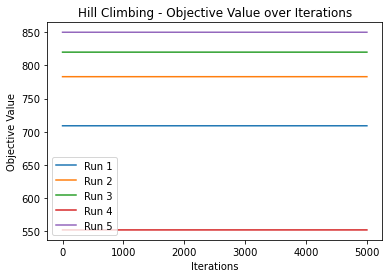

In [209]:
# Plot the histories for each run
for run, history in enumerate(all_histories):
    plt.plot(range(len(history)), history, label=f"Run {run+1}")

plt.xlabel("Iterations")
plt.ylabel("Objective Value")
plt.title("Hill Climbing - Objective Value over Iterations")
plt.legend()
plt.show()

## Experiment using genetic algorithm

### Introduction
To improve the experiment outcome, we implemented a Genetic Algorithm using roulette wheel selection. It definetly yeilded better result. However, James highlighted one important point that we might be loosing the best from a particular generation so suggested introducing elitism to preserve the best solution from each generation. We observed that the Genetic Algorithm with elitism significantly outperformed the other algorithms and novel ideas with a total value 1268.

In [212]:
import random

# Function to generate a valid initial population
def generate_population(pop_size, num_items, num_trucks):
    population = []
    while len(population) < pop_size:
        solution = []
        container_weights = [0] * num_trucks  # Track the weight of items in each truck
        # truck weight limits
        weight_limits = [72, 80, 109]
        for j in range(num_items):            
            truck = random.randint(0, num_trucks - 1)
            new_item_weight = items[j][0]
            # Check whether addition of this item to this truck makes it overweight
            if container_weights[truck] + new_item_weight <= weight_limits[truck]:
                chunk = [0] * num_trucks
                chunk[truck] = 1
                solution.extend(chunk)
                container_weights[truck] += new_item_weight           

        # Only add valid solutions to the population (those that satisfy constraints)
        if objective_function(solution) > 0:  
            population.append(solution)
    return population

def roulette_wheel_selection(population, fitness_scores):
    selection_probabilities = [fitness / sum(fitness_scores) for fitness in fitness_scores]
    selected_parents = []
    
    for _ in range(len(population) // 2):
        selected = random.choices(population, selection_probabilities, k=2)
        selected_parents.extend(selected)
    
    return selected_parents


# Genetic Algorithm Parameters
population_size = 100
num_generations = 50
mutation_rate = 0.1
num_trucks = 3

# Main Genetic Algorithm
def genetic_algorithm():
    population = generate_population(population_size, len(items), num_trucks)
    history = []; gen_plot = []; best_solution = None
    # For 50 generations
    for generation in range(num_generations):
        # Evaluate fitness of the population
        fitness_scores = [objective_function(solution) for solution in population ] 
        
        # Applying Elitism
        # Store the best solution of this generation
        # best_in_generation = max(population, key=objective_function)
        # gen_plot.append(objective_function(best_in_generation))
        
        # if best_solution is None or objective_function(best_in_generation) > objective_function(best_solution):
        #     best_solution = best_in_generation
           
        # Select parents based on fitness scores (roulette wheel selection)       
        selected_parents = roulette_wheel_selection(population, fitness_scores)                                
        
        # Create offspring using crossover
        offspring = []
        for i in range(0, len(selected_parents), 2):
            parent1 = selected_parents[i]
            parent2 = selected_parents[i + 1]
            # Treat each chunk of 3 bits as an item and avoid taking start and end as the cross-over point
            crossover_point = random.randint(1, len(parent1) // 3 - 1)  

            # Perform crossover
            child1 = parent1[:crossover_point * 3] + parent2[crossover_point * 3:]
            child2 = parent2[:crossover_point * 3] + parent1[crossover_point * 3:]           
            offspring.extend([child1, child2])                        
        
        # Apply mutation
        for i in range(len(offspring)):
            if random.random() < mutation_rate:
                mutation_point = random.randint(0, len(offspring[i]) // 3 - 1)  
                # Adjust the mutation_point to the start of the selected item
                mutation_point *= 3

                # Determine the chunk index based on the mutation point
                chunk_index = mutation_point // 3

                # Check if the chunk already has an item added to a truck
                chunk = offspring[i][chunk_index * 3:chunk_index * 3 + 3]
                if sum(chunk) > 0:
                    # Reset the bits associated with the item to zero
                    offspring[i][chunk_index * 3:chunk_index * 3 + 3] = [0, 0, 0]
                #print("Mutation in progress...")
                # Apply mutation by flipping the value at the selected mutation_point
                offspring[i][mutation_point] = 1 - offspring[i][mutation_point]                      
        
        # Include the best solution from the previous generation in the offspring
        if best_solution is not None:
            offspring.append(best_solution)
        
        best_in_generation = max(offspring, key=objective_function)
        gen_plot.append(objective_function(best_in_generation)) 
        population = offspring              
            
    for offspring in population:        
        history.append(objective_function(offspring))
    
    # Find and return the best solution overall    
    best_solution = max(population, key=objective_function)
    return best_solution, history, gen_plot   

In [214]:
# Store results for each run
results = []
num_runs = 5
# Run the genetic algorithm 5 times with different seeds
for seed in range(num_runs):
    solution, history, gen_plot = genetic_algorithm()
    results.append((solution, history, gen_plot))

# Compare the mean performance across all runs
mean_objective = sum(objective_function(sol) for sol, _, _ in results) / num_runs
print(f"Mean performance (objective value) across {num_runs} runs: {mean_objective}")

Mean performance (objective value) across 5 runs: 1090.4


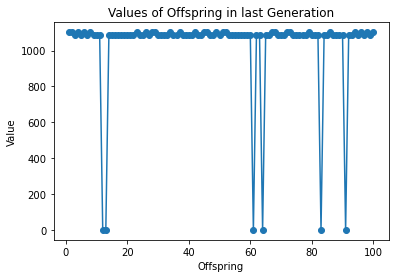

In [216]:
import matplotlib.pyplot as plt
# Create a plot of values vs. offspring
offspring_indices = list(range(1, 101))  # Indices for the offspring
plt.plot(offspring_indices, history, marker='o', linestyle='-')

plt.xlabel("Offspring")
plt.ylabel("Value")
plt.title("Values of Offspring in last Generation")

plt.show()

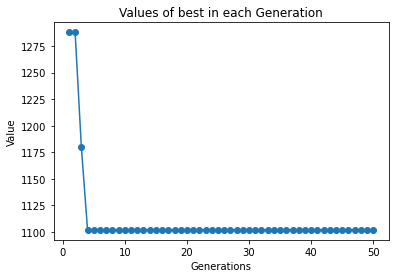

In [218]:
# Create a plot of values vs. gen_plot
generations = list(range(1, 51))  # Indices for the offspring
plt.plot(generations, gen_plot, marker='o', linestyle='-')

plt.xlabel("Generations")
plt.ylabel("Value")
plt.title("Values of best in each Generation")

plt.show()

## Summarize
Our results indicate that the Genetic Algorithm with elitism is a promising approach for solving the multi-truck packing problem. The initial novel ideas of nbr_new and nbr_shuffle in Hill Climbing did not yield satisfactory results, highlighting the importance of carefully designing neighbor operators. Additionally, it was surprising to observe that a basic Hill Climbing algorithm, designed for single-truck knapsack problems, outperformed our novel ideas in this complex problem.

The success of the Genetic Algorithm can be attributed to its ability to explore a broader search space through crossover and mutation, while elitism ensured the preservation of the best solutions.